# Mads_Weekly_Workout_4 - pnatland

__Background:__ A former student of mine recently was applied to a data science job and this was a part of his interview.  The goal was to give him the opportunity to show what he could do and for the company ensure that he had some basic knowledge about Python and Data Manipulation

Anyway, figured it could be a good workout!  I look forward to seeing what people do!

__Let's plan to upload something to SLACK before FRIDAY 1/31/20) so we have an end-goal in mind =)__

## Imports and Notebook Setup

In [1]:
#for data manipulation
import numpy as np
import pandas as pd

#to convert timestamps to more convenient datetime format
from datetime import datetime

#for visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
#import plotly.graph_objects as go
%matplotlib inline

#for interactivity
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

#go widescreen =)
from IPython.core.display import display, HTML; display(HTML("<style>.container { width:99% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

## Loading & Exploring Dataset

This was an energy company, so the data sets are from the US Environmental Protection Agency

Useful link to dataset: https://www.fgdl.org/metadata/metadata_archive/fgdl_html/epaegrid_oct06.htm

In [2]:
epa=pd.read_csv("epa_plant_data.csv")


epa.head()

,PSTATABB,ORISPL,PNAME,OPRNAME,BANAME,OPRCODE,BACODE,LON,LAT,NAMEPCAP[MW],RMBMFLAG,PLPRMFL,PLFUELCT,COALFLAG
0,AK,62,Annex Creek,Alaska Electric Light&Power Co,Alaska Miscellaneous,213,NaN,-134.1010,58.3176,4.0,NaN,WAT,HYDRO,NaN
1,AK,63,Gold Creek,Alaska Electric Light&Power Co,Alaska Miscellaneous,213,NaN,-134.4174,58.3107,9.7,NaN,WAT,HYDRO,NaN
2,AK,64,Lemon Creek,Alaska Electric Light&Power Co,Alaska Miscellaneous,213,NaN,-134.4953,58.3536,61.7,NaN,DFO,OIL,NaN
3,AK,65,Salmon Creek 1,Alaska Electric Light&Power Co,Alaska Miscellaneous,213,NaN,-134.4631,58.3269,8.5,NaN,WAT,HYDRO,NaN
4,AK,66,Skagway,Alaska Power and Telephone Co,Alaska Miscellaneous,219,NaN,-135.3131,59.4545,4.4,NaN,WAT,HYDRO,NaN


In [3]:
epa.shape

(9709, 14)

In [4]:
# Are FL & IL in the set twice?
epa['PSTATABB'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'FLORIDA', 'GA', 'HI', 'IA', 'ID', 'Mid West', 'IL', 'Illinois',
       'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS',
       'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'], dtype=object)

In [5]:
#there are 4 over 50....2 duplicates, the midwest, and DC (not a state)
epa['PSTATABB'].nunique()

54

In [6]:
#the two are not the same
epa[epa['PSTATABB'] == 'FL'] is epa[epa['PSTATABB'] == 'FLORIDA']

False

In [7]:
epa[epa['PSTATABB'] == 'FL']

,PSTATABB,ORISPL,PNAME,OPRNAME,BANAME,OPRCODE,BACODE,LON,LAT,NAMEPCAP[MW],RMBMFLAG,PLPRMFL,PLFUELCT,COALFLAG
2285,FL,136,Seminole (136),Seminole Electric Cooperative Inc,Seminole Electric Cooperative,21554,SEC,-81.632778,29.733056,2321.8,NaN,BIT,COAL,Yes
2286,FL,164,Big Pine,NaN,No balancing authority,-9999,NaN,-81.685000,24.579167,2.7,NaN,DFO,OIL,NaN
2287,FL,207,St. Johns River Power,JEA,JEA,9617,JEA,-81.550800,30.430800,1358.0,NaN,BIT,COAL,Yes
2288,FL,564,Curtis H. Stanton Energy Center,Orlando Utilities Comm,Florida Municipal Power Pool,14610,FMPP,-81.167800,28.482200,1262.0,Yes,BIT,COAL,Yes
2289,FL,609,Cape Canaveral,Florida Power & Light Co,Florida Power & Light Company,6452,FPL,-80.764400,28.469800,2099.0,NaN,NG,GAS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,FL,61080,Sub 12,City of Tallahassee - (FL),City of Tallahassee,18445,TAL,-84.260028,30.459813,18.6,NaN,NG,GAS,NaN
2491,FL,61173,IKEA Miami 327,Florida Power & Light Co,Florida Power & Light Company,6452,FPL,-80.383800,25.791500,1.0,NaN,SUN,SOLAR,NaN
2492,FL,61246,ACE-Stanton PV,Orlando Utilities Comm,Florida Municipal Power Pool,14610,FMPP,-81.180360,28.477350,4.8,NaN,SUN,SOLAR,NaN
2493,FL,61247,ACE-Stanton A PV,Orlando Utilities Comm,Florida Municipal Power Pool,14610,FMPP,-81.174110,28.484550,4.1,NaN,SUN,SOLAR,NaN


In [8]:
epa[epa['PSTATABB'] == 'FLORIDA']

,PSTATABB,ORISPL,PNAME,OPRNAME,BANAME,OPRCODE,BACODE,LON,LAT,NAMEPCAP[MW],RMBMFLAG,PLPRMFL,PLFUELCT,COALFLAG
2359,FLORIDA,7997,Winston,City of Lakeland - (FL),Florida Municipal Power Pool,10623,FMPP,-82.0164,28.0274,50.0,NaN,DFO,OIL,NaN
2438,FLORIDA,56930,Space Coast Next Gen Solar Energy,Florida Power & Light Co,Florida Power & Light Company,6452,FPL,-80.6811,28.4586,10.0,NaN,SUN,SOLAR,NaN


In [9]:
#this fixes the problem of multiple FL
epa['PSTATABB'] = epa['PSTATABB'].replace('FLORIDA','FL')

#this fixes the problem of multiple IL
epa['PSTATABB'] = epa['PSTATABB'].replace('Illinois','IL')

In [10]:
#just checking it worked =)
epa[epa['PSTATABB'] == 'FLORIDA']

,PSTATABB,ORISPL,PNAME,OPRNAME,BANAME,OPRCODE,BACODE,LON,LAT,NAMEPCAP[MW],RMBMFLAG,PLPRMFL,PLFUELCT,COALFLAG


In [11]:
epa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 14 columns):
PSTATABB        9709 non-null object
ORISPL          9709 non-null int64
PNAME           9709 non-null object
OPRNAME         9556 non-null object
BANAME          9709 non-null object
OPRCODE         9709 non-null int64
BACODE          9438 non-null object
LON             9668 non-null float64
LAT             9668 non-null float64
NAMEPCAP[MW]    9696 non-null float64
RMBMFLAG        759 non-null object
PLPRMFL         9653 non-null object
PLFUELCT        9653 non-null object
COALFLAG        447 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 1.0+ MB


In [12]:
epa['BANAME'].value_counts()

Midcontinent Independent Transmission System Operator, Inc..    1589
PJM Interconnection, LLC                                        1366
California Independent System Operator                          1301
ISO New England Inc.                                             760
Southwest Power Pool                                             590
                                                                ... 
Constellation Energy Control and Dispatch, LLC                     1
New Harquahala Generating Company, LLC - HGBA                      1
Duke Energy Progress West                                          1
City of Homestead                                                  1
Arlington Valley, LLC - AVBA                                       1
Name: BANAME, Length: 77, dtype: int64

Using a widget to explore what is in the data

In [13]:
#creating a drop down of what can be graphed in the df
potential_columns=[]
for col in epa.columns:
    if epa[col].dtype != 'object':
        potential_columns.append(col)
        
#Also, removing 'timestamp' because it is the wrong type for this graphic
#potential_columns.remove('timestamp')

@interact(col_name=
widgets.Dropdown(
    options=potential_columns,
    value=potential_columns[4],
    description='Data:',
))

#a definition for better reusability
def plot_data(col_name):
    
    #graph parameters:
    title   =   "Distribution of Data Values"
    data    =   epa
    y       =   epa[col_name]
    
    plt.figure(figsize=(12,7))

    sns.violinplot(
               y = y,
               data=data,
               width=0.8,
               palette='Blues_r',
               inner = 'box',
               showmedians=True,
               cut=0  #             <---------  This is to see exactly where max/min values lie
              )
    
    plt.title(title, fontsize=16)
    plt.ylabel(col_name, fontsize=14)
    plt.grid(True, alpha=0.5)
    
    plt.show()

interactive(children=(Dropdown(description='Data:', index=4, options=('ORISPL', 'OPRCODE', 'LON', 'LAT', 'NAME…

In [14]:
#I am wondering if the value for PLANT 1893 is incorrect here...it is basicall double the next highest in the df.
epa[epa['NAMEPCAP[MW]'] > 6000]

,PSTATABB,ORISPL,PNAME,OPRNAME,BANAME,OPRCODE,BACODE,LON,LAT,NAMEPCAP[MW],RMBMFLAG,PLPRMFL,PLFUELCT,COALFLAG
2334,FL,6043,Martin,Florida Power & Light Co,Florida Power & Light Company,6452,FPL,-80.562800,27.053600,6071.5,NaN,NG,GAS,NaN
4735,MN,1893,Boswell Energy Center,"ALLETE, Inc.",Midcontinent Independent Transmission System O...,12647,MISO,-93.652800,47.261100,10733.0,NaN,SUB,COAL,Yes
9273,WA,6163,Grand Coulee,Bonneville Power Administration,Bonneville Power Administration,1738,BPAT,-118.977323,47.957511,6809.0,NaN,WAT,HYDRO,NaN


In [15]:
#and there are over 380 other plants in the region...
len(epa[epa['PSTATABB'] == 'MN'])

383

In [16]:
#coal is repeated 3 times...and there is an NaN value...
epa['PLFUELCT'].unique()

array(['HYDRO', 'OIL', 'GAS', 'COAL', 'WIND', 'OTHF', 'BIOMASS',
       'NUCLEAR', 'OFSL', 'SOLAR', nan, 'coaL', 'GEOTHERMAL', 'coal'],
      dtype=object)

In [17]:
#coal is repeated 3 times
epa['PLFUELCT'].value_counts()

SOLAR         2475
GAS           1973
HYDRO         1510
WIND          1208
OIL            906
BIOMASS        820
COAL           427
OTHF           134
GEOTHERMAL      78
NUCLEAR         66
OFSL            36
coal            10
coaL            10
Name: PLFUELCT, dtype: int64

In [18]:
#Fix the COAL issues so it doesn't affect data
epa['PLFUELCT'] = epa['PLFUELCT'].replace('coal','COAL')
epa['PLFUELCT'] = epa['PLFUELCT'].replace('coaL','COAL')

In [19]:
#according to: https://www.epa.gov/sites/production/files/2015-09/documents/data_elements_egrid_2014.pdf
# I am not sure what OTHF should represent..
epa['PLFUELCT'].value_counts()

SOLAR         2475
GAS           1973
HYDRO         1510
WIND          1208
OIL            906
BIOMASS        820
COAL           447
OTHF           134
GEOTHERMAL      78
NUCLEAR         66
OFSL            36
Name: PLFUELCT, dtype: int64

In [20]:
#all have fairly low NAMEPCAP[MW] values..
epa[epa['PLFUELCT']=='OTHF'].head()

,PSTATABB,ORISPL,PNAME,OPRNAME,BANAME,OPRCODE,BACODE,LON,LAT,NAMEPCAP[MW],RMBMFLAG,PLPRMFL,PLFUELCT,COALFLAG
127,AK,57583,Battery Energy Storage System,Golden Valley Elec Assn Inc,Alaska Miscellaneous,7353,NaN,-147.725000,64.816700,40.0,NaN,MWH,OTHF,NaN
132,AK,58405,ESS Battery,Kodiak Electric Assn Inc,Alaska Miscellaneous,10433,NaN,-152.404167,57.799167,3.0,NaN,MWH,OTHF,NaN
146,AK,60563,Flywheel Energy Storage System,Kodiak Electric Assn Inc,Alaska Miscellaneous,10433,NaN,-152.443783,57.780114,2.0,NaN,MWH,OTHF,NaN
201,AL,50730,US Steel (Fairfield Works),Alabama Power Co,"Southern Company Services, Inc. - Trans",195,SOCO,-86.921200,33.488500,82.0,NaN,PRG,OTHF,NaN
208,AL,54743,District 100 Transco Gas Pipe Line,Alabama Power Co,"Southern Company Services, Inc. - Trans",195,SOCO,-86.720000,32.668889,1.6,NaN,WH,OTHF,NaN


In [21]:
#looking into NaN values for power plant type...interesting to guess which type they are...56 is a fair amount...
display(len(epa[epa['PLFUELCT'].isnull()]))
display(epa[epa['PLFUELCT'].isnull()].head())

56

,PSTATABB,ORISPL,PNAME,OPRNAME,BANAME,OPRCODE,BACODE,LON,LAT,NAMEPCAP[MW],RMBMFLAG,PLPRMFL,PLFUELCT,COALFLAG
233,AR,167,Cecil Lynch,Entergy Arkansas Inc,Midcontinent Independent Transmission System O...,814,MISO,-92.198700,34.753500,231.0,NaN,NaN,NaN,NaN
309,AZ,143,Crosscut,Salt River Project,Salt River Project,16572,SRP,-111.946052,33.439375,33.0,NaN,NaN,NaN,NaN
436,AZ,60996,Iron Horse Battery Storage,Tucson Electric Power Co,Tucson Electric Power Company,24211,TEPC,-110.819119,32.098492,12.0,NaN,NaN,NaN,NaN
478,CA,247,Hunters Point,NaN,No balancing authority,-9999,NaN,-122.389722,37.733611,427.4,NaN,NaN,NaN,NaN
526,CA,307,North Island,NaN,No balancing authority,-9999,NaN,-117.190277,32.705000,37.0,NaN,NaN,NaN,NaN


In [22]:
df_generation=pd.read_csv("unit_generation_data.csv")

df_generation.head()

,STATE,FACILITY_NAME,ORISPL_CODE,UNITID,Timestamp_UTC,OP_DATE,OP_HOUR,OP_TIME,GLOAD[MW],SLOAD[1000lb/hr],...,HCL_MASS[lbs],HCL_MEASURE_FLG,HF_RATE_EO[lb/MWh],HF_RATE_HI[lb/MMBtu],HF_MASS[lbs],HF_MEASURE_FLG,HEAT_INPUT[mmBtu],FAC_ID,UNIT_ID,OP_YEAR
0,LA,Big Cajun 2,6055,2B1,2017-01-02 01:00:00,2017-01-01 00:00:00,19,1.0,4470,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4890.9,800,2724,2017
1,LA,Big Cajun 2,6055,2B3,2017-01-02 01:00:00,2017-01-01 00:00:00,19,1.0,5490,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6420.3,800,2726,2017
2,LA,Big Cajun 2,6055,2B2,2017-01-02 01:00:00,2017-01-01 00:00:00,19,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800,2725,2017
3,LA,Big Cajun 2,6055,2B2,2017-01-02 02:00:00,2017-01-01 00:00:00,20,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800,2725,2017
4,LA,Big Cajun 2,6055,2B1,2017-01-02 02:00:00,2017-01-01 00:00:00,20,1.0,4410,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4868.2,800,2724,2017


In [23]:
df_generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598404 entries, 0 to 598403
Data columns (total 38 columns):
STATE                    598404 non-null object
FACILITY_NAME            598404 non-null object
ORISPL_CODE              598404 non-null int64
UNITID                   598404 non-null object
Timestamp_UTC            598404 non-null object
OP_DATE                  598404 non-null object
OP_HOUR                  598404 non-null int64
OP_TIME                  598404 non-null float64
GLOAD[MW]                336808 non-null object
SLOAD[1000lb/hr]         0 non-null float64
SO2_MASS[lbs]            336808 non-null float64
SO2_MASS_MEASURE_FLG     393359 non-null object
SO2_RATE[lbs/mmBtu]      336808 non-null float64
SO2_RATE_MEASURE_FLG     393359 non-null object
NOX_RATE[lbs/mmBtu]      336808 non-null float64
NOX_RATE_MEASURE_FLG     393359 non-null object
NOX_MASS[lbs]            336808 non-null float64
NOX_MASS_MEASURE_FLG     393359 non-null object
CO2_MASS[tons]           3

In [24]:
#only a small number of states represented here..
df_generation['STATE'].unique()

array(['LA', 'MN', 'GA', 'MD', 'PA', 'IN', 'WA', 'FL', 'ND', 'IL'],
      dtype=object)

In [25]:
#creating a drop down of what can be graphed in the df
potential_columns=[]
for col in df_generation.columns:
    if df_generation[col].dtype != 'object':
        potential_columns.append(col)


@interact(col_name=
widgets.Dropdown(
    options=potential_columns,
    value=potential_columns[0],
    description='Data:',
))

#a definition for better reusability
def plot_data(col_name):
    
    #graph parameters:
    title   =   "Distribution of Data Values"
    data    =   df_generation
    y       =   df_generation[col_name]
    
    plt.figure(figsize=(12,7))

    sns.violinplot(
               y = y,
               data=data,
               width=0.8,
               palette='Blues_r',
               inner = 'box',
               showmedians=True,
               linewidth=1.5,
               cut=0  #             <---------  This is to see exactly where max/min values lie
              )
    
    plt.title(title, fontsize=16)
    plt.ylabel(col_name, fontsize=14)
    plt.grid(True, alpha=0.5)
    
    plt.show()

interactive(children=(Dropdown(description='Data:', options=('ORISPL_CODE', 'OP_HOUR', 'OP_TIME', 'SLOAD[1000l…

In [26]:
#that is a low min value....
df_generation['HEAT_INPUT[mmBtu]'].describe()

count    336808.000000
mean       4197.819296
std        2159.281680
min           0.020000
25%        2625.500000
50%        4387.200000
75%        5850.000000
max       19935.600000
Name: HEAT_INPUT[mmBtu], dtype: float64

In [27]:
"""
what is going on with these guys?  Are these errors?  This is supposed to be 'one million British Thermal Units (BTU)'..and it is reading
the same as OP_TIME value?
"""
display(df_generation[df_generation['HEAT_INPUT[mmBtu]'] == 0.02])

,STATE,FACILITY_NAME,ORISPL_CODE,UNITID,Timestamp_UTC,OP_DATE,OP_HOUR,OP_TIME,GLOAD[MW],SLOAD[1000lb/hr],...,HCL_MASS[lbs],HCL_MEASURE_FLG,HF_RATE_EO[lb/MWh],HF_RATE_HI[lb/MMBtu],HF_MASS[lbs],HF_MEASURE_FLG,HEAT_INPUT[mmBtu],FAC_ID,UNIT_ID,OP_YEAR
35584,LA,Big Cajun 2,6055,2B1,2018-05-11 06:00:00,2018-05-11 00:00:00,0,0.02,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02,800,2724,2018
76212,MN,Boswell Energy Center,1893,4,2017-04-23 10:00:00,2017-04-23 00:00:00,4,0.02,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02,372,1234,2017
91578,MN,Boswell Energy Center,1893,2,2017-09-30 12:00:00,2017-09-30 00:00:00,6,0.02,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02,372,1232,2017
343879,IN,Cayuga,1001,2,2017-02-14 16:00:00,2017-02-14 00:00:00,11,0.02,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02,195,707,2017
475557,FL,Curtis H. Stanton Energy Center,564,2,2018-02-23 01:00:00,2018-02-22 00:00:00,20,0.02,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02,98,369,2018


## Data Cleaning & Manipulation

In [28]:
#code

## Questions from 'Assessment'

### 1. List all the data errors you discover along the way

 write list here:
 
__EPA set:__
 - FL, IL had some mislabeled columns (corrected for better data analysis)
 - Coal was miswritten in column (corrected for better data analysis)
 - Potential error related to value entered for plant ORISPL 1893...its NAMECAP value is a significant outlier.  A possible input error?
 
__UNIT_GENERATION set:__
 -  UNITID has combination of numbers and strings...assuming that '1' should equal 1.
 -  in the HEAT_INPUT[mmBtu] column, there are 5 readings that are significant outliers at "0.020000" where the mean and standard deviation
    are 4197.82 mmBtu and 2159.28 mmBtu, respectively.  Possibly an input error (it reads the same as the OP_TIME value, as well)?
 - appears to be issue with mixed types (numeric and object) in the GLOAD[MW] column (corrected for better data analysis)

### 2. Calculate how many unique power plants there are in the epa_plant_data set

In [29]:
#ORISPL is the plant code
print("The number of unique power plants is: " + str(epa['ORISPL'].nunique()))

The number of unique power plants is: 9709


### 3. Calculate how many unique units there are in the in the unit_generation_data set

In [30]:
#assuming UNITID has unique unit types.
df_generation['UNITID'].nunique()

18

In [31]:
#I feel that '1' and 1 should be the same, so I will merge them (especially because the dtypes are different)
df_generation['UNITID'].unique()

array(['2B1', '2B3', '2B2', '1', '2', '3', '4', 2, 1, 4, 3, '2BLR',
       '1BLR', '4BLR', '3BLR', 'BW21', 'BW22', 'CCB'], dtype=object)

In [32]:
#Fixing UNITID issue
df_generation['UNITID'] = df_generation['UNITID'].replace(1,'1')
df_generation['UNITID'] = df_generation['UNITID'].replace(2,'2')
df_generation['UNITID'] = df_generation['UNITID'].replace(3,'3')
df_generation['UNITID'] = df_generation['UNITID'].replace(4,'4')

In [33]:
print("The number of unique units is: " + str(df_generation['UNITID'].nunique()))

The number of unique units is: 14


### 4. List all unique fuel types in the epa_plant_data set

In [34]:
"""
I am not going to count NaN values and I do want to note that I am note sure what the code OTHF stands for... not in the documentation
here: https://www.epa.gov/sites/production/files/2015-09/documents/data_elements_egrid_2014.pdf
"""
epa['PLFUELCT'].unique()

array(['HYDRO', 'OIL', 'GAS', 'COAL', 'WIND', 'OTHF', 'BIOMASS',
       'NUCLEAR', 'OFSL', 'SOLAR', nan, 'GEOTHERMAL'], dtype=object)

In [35]:
print("The unique fuel types are: " + str(epa['PLFUELCT'].unique()) + ".  NOTE: 'nan' represents missing data on the plant.")

The unique fuel types are: ['HYDRO' 'OIL' 'GAS' 'COAL' 'WIND' 'OTHF' 'BIOMASS' 'NUCLEAR' 'OFSL'
 'SOLAR' nan 'GEOTHERMAL'].  NOTE: 'nan' represents missing data on the plant.


### 5. Calculate the total generation capacity (GW) (NAMEPCAP[MW]) for each fuel type

In [36]:
epa.head()

,PSTATABB,ORISPL,PNAME,OPRNAME,BANAME,OPRCODE,BACODE,LON,LAT,NAMEPCAP[MW],RMBMFLAG,PLPRMFL,PLFUELCT,COALFLAG
0,AK,62,Annex Creek,Alaska Electric Light&Power Co,Alaska Miscellaneous,213,NaN,-134.1010,58.3176,4.0,NaN,WAT,HYDRO,NaN
1,AK,63,Gold Creek,Alaska Electric Light&Power Co,Alaska Miscellaneous,213,NaN,-134.4174,58.3107,9.7,NaN,WAT,HYDRO,NaN
2,AK,64,Lemon Creek,Alaska Electric Light&Power Co,Alaska Miscellaneous,213,NaN,-134.4953,58.3536,61.7,NaN,DFO,OIL,NaN
3,AK,65,Salmon Creek 1,Alaska Electric Light&Power Co,Alaska Miscellaneous,213,NaN,-134.4631,58.3269,8.5,NaN,WAT,HYDRO,NaN
4,AK,66,Skagway,Alaska Power and Telephone Co,Alaska Miscellaneous,219,NaN,-135.3131,59.4545,4.4,NaN,WAT,HYDRO,NaN


In [37]:
epa_fuel_types = epa.groupby('PLFUELCT').agg('sum')['NAMEPCAP[MW]']

epa_fuel_types

PLFUELCT
BIOMASS        19044.4
COAL          375153.3
GAS           668853.6
GEOTHERMAL      4514.9
HYDRO         103906.7
NUCLEAR       120776.4
OFSL            8243.9
OIL            52770.9
OTHF            5887.2
SOLAR          37698.5
WIND          114521.6
Name: NAMEPCAP[MW], dtype: float64

In [38]:
"""
ANSWER: Converted to GigaWatts
"""
epa_fuel_types*.001

PLFUELCT
BIOMASS        19.0444
COAL          375.1533
GAS           668.8536
GEOTHERMAL      4.5149
HYDRO         103.9067
NUCLEAR       120.7764
OFSL            8.2439
OIL            52.7709
OTHF            5.8872
SOLAR          37.6985
WIND          114.5216
Name: NAMEPCAP[MW], dtype: float64

### 6. Calculate the total capacity of coal plants in each US State

In [39]:
#for the purpose of this question, I decided to drop midwest, but keep Washington DC (even though it is not a state)

epa_coal_cap_by_state = epa[epa.PSTATABB != 'Mid West']

In [40]:
epa_coal_cap_by_state = epa_coal_cap_by_state[epa_coal_cap_by_state['PLFUELCT'] == 'COAL']

In [41]:
"""
ANSWER: Values in MegaWatts.  Not all states represented because - presumably - not all have coal-fire plants.
"""
epa_coal_cap_by_state = epa_coal_cap_by_state.groupby('PSTATABB').agg('sum')['NAMEPCAP[MW]']

display(str(51 - len(epa_coal_cap_by_state)) + " do not have Coal Power Plants.") 
display(epa_coal_cap_by_state)

'4 do not have Coal Power Plants.'

PSTATABB
AK      219.7
AL    13446.8
AR     5487.0
AZ     7199.8
CA      100.7
CO     7574.5
CT      581.6
DE      804.1
FL    12425.5
GA    13627.6
HI      203.0
IA     7025.0
ID       10.2
IL    16680.4
IN    22228.3
KS     5651.7
KY    19632.4
LA     5066.6
MA     1746.9
MD     5663.8
MI    15351.1
MN    14492.5
MO    13147.3
MS      913.7
MT     2679.2
NC    13574.7
ND     4443.1
NE     4314.0
NH      496.4
NJ     3329.5
NM     4374.6
NV     4749.6
NY     3009.2
OH    19532.0
OK     9321.8
OR      642.2
PA    18316.6
SC     6412.3
SD      451.0
TN    12187.9
TX    31656.6
UT     5545.2
VA     5904.7
WA     1783.8
WI     8976.9
WV    16151.5
WY     8020.3
Name: NAMEPCAP[MW], dtype: float64

### 7. Create a dataframe which shows the aggregated generation per year for each *power plant* and PLOT the values over time using unit_generation_data

In [42]:
df_generation.head()

,STATE,FACILITY_NAME,ORISPL_CODE,UNITID,Timestamp_UTC,OP_DATE,OP_HOUR,OP_TIME,GLOAD[MW],SLOAD[1000lb/hr],...,HCL_MASS[lbs],HCL_MEASURE_FLG,HF_RATE_EO[lb/MWh],HF_RATE_HI[lb/MMBtu],HF_MASS[lbs],HF_MEASURE_FLG,HEAT_INPUT[mmBtu],FAC_ID,UNIT_ID,OP_YEAR
0,LA,Big Cajun 2,6055,2B1,2017-01-02 01:00:00,2017-01-01 00:00:00,19,1.0,4470,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4890.9,800,2724,2017
1,LA,Big Cajun 2,6055,2B3,2017-01-02 01:00:00,2017-01-01 00:00:00,19,1.0,5490,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6420.3,800,2726,2017
2,LA,Big Cajun 2,6055,2B2,2017-01-02 01:00:00,2017-01-01 00:00:00,19,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800,2725,2017
3,LA,Big Cajun 2,6055,2B2,2017-01-02 02:00:00,2017-01-01 00:00:00,20,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800,2725,2017
4,LA,Big Cajun 2,6055,2B1,2017-01-02 02:00:00,2017-01-01 00:00:00,20,1.0,4410,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4868.2,800,2724,2017


In [43]:
#3 years represented....but 2019 has no data
df_generation['OP_YEAR'].unique()

array([2017, 2018, 2019], dtype=int64)

In [44]:
df_generation = df_generation[df_generation.OP_YEAR != 2019]

In [45]:
#there are a lot of NaN values...
df_generation.isna().sum()

STATE                         0
FACILITY_NAME                 0
ORISPL_CODE                   0
UNITID                        0
Timestamp_UTC                 0
OP_DATE                       0
OP_HOUR                       0
OP_TIME                       0
GLOAD[MW]                148652
SLOAD[1000lb/hr]         485460
SO2_MASS[lbs]            148652
SO2_MASS_MEASURE_FLG     148652
SO2_RATE[lbs/mmBtu]      148652
SO2_RATE_MEASURE_FLG     148652
NOX_RATE[lbs/mmBtu]      148652
NOX_RATE_MEASURE_FLG     148652
NOX_MASS[lbs]            148652
NOX_MASS_MEASURE_FLG     148652
CO2_MASS[tons]           148652
CO2_MASS_MEASURE_FLG     148652
CO2_RATE[tons/mmBtu]     148652
CO2_RATE_MEASURE_FLG     148652
HG_RATE_EO[lb/GWh]       260117
HG_RATE_HI[lb/TBtu]      219752
HG_MASS[lbs]             219752
HG_MEASURE_FLG           257028
HCL_RATE_EO[lb/MWh]      485460
HCL_RATE_HI[lb/MMBtu]    485460
HCL_MASS[lbs]            485460
HCL_MEASURE_FLG          485460
HF_RATE_EO[lb/MWh]       485460
HF_RATE_

In [46]:
df_generation['GLOAD[MW]'].unique()

array([4470.0, 5490.0, nan, ..., 118.0, 135.0, 119.0], dtype=object)

In [47]:
#fixing issue of mixed types in GLOAD column...
df_generation['GLOAD[MW]'] = pd.to_numeric(df_generation['GLOAD[MW]'], errors='coerce')

In [48]:
df_generation['GLOAD[MW]'].dtype

dtype('float64')

In [49]:
df_generation_agg = df_generation.groupby(['ORISPL_CODE', 'OP_YEAR']).sum()

In [50]:
df_generation_agg.reset_index().head()

,ORISPL_CODE,OP_YEAR,OP_HOUR,OP_TIME,GLOAD[MW],SLOAD[1000lb/hr],SO2_MASS[lbs],SO2_RATE[lbs/mmBtu],NOX_RATE[lbs/mmBtu],NOX_MASS[lbs],...,HCL_RATE_HI[lb/MMBtu],HCL_MASS[lbs],HCL_MEASURE_FLG,HF_RATE_EO[lb/MWh],HF_RATE_HI[lb/MMBtu],HF_MASS[lbs],HF_MEASURE_FLG,HEAT_INPUT[mmBtu],FAC_ID,UNIT_ID
0,564,2017,301650,22221.41,6706507.0,0.0,6.063181e+06,1601.416,3042.547,9.796712e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.060776e+07,2569560,797839640
1,564,2018,301905,22235.63,6544310.0,0.0,4.745408e+06,1332.506,3197.171,9.949140e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.816671e+07,2573970,799208930
2,602,2017,201100,9766.30,4327977.0,0.0,5.020396e+06,938.762,759.746,3.263261e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.420321e+07,1922800,6913340
3,602,2018,201270,11455.91,5348601.0,0.0,7.060833e+06,1301.137,892.023,3.964479e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.383446e+07,1926100,6925205
4,703,2017,402200,23888.75,15085792.0,0.0,1.888059e+07,3032.360,2915.557,1.750578e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.475923e+08,5174080,18721080


In [51]:
#lost non-numeric columns
display(df_generation_agg.columns)
display(df_generation_agg.describe())

Index(['OP_HOUR', 'OP_TIME', 'GLOAD[MW]', 'SLOAD[1000lb/hr]', 'SO2_MASS[lbs]',
       'SO2_RATE[lbs/mmBtu]', 'NOX_RATE[lbs/mmBtu]', 'NOX_MASS[lbs]',
       'CO2_MASS[tons]', 'CO2_RATE[tons/mmBtu]', 'HG_RATE_EO[lb/GWh]',
       'HG_RATE_HI[lb/TBtu]', 'HG_MASS[lbs]', 'HCL_RATE_EO[lb/MWh]',
       'HCL_RATE_HI[lb/MMBtu]', 'HCL_MASS[lbs]', 'HCL_MEASURE_FLG',
       'HF_RATE_EO[lb/MWh]', 'HF_RATE_HI[lb/MMBtu]', 'HF_MASS[lbs]',
       'HF_MEASURE_FLG', 'HEAT_INPUT[mmBtu]', 'FAC_ID', 'UNIT_ID'],
      dtype='object')

,OP_HOUR,OP_TIME,GLOAD[MW],SLOAD[1000lb/hr],SO2_MASS[lbs],SO2_RATE[lbs/mmBtu],NOX_RATE[lbs/mmBtu],NOX_MASS[lbs],CO2_MASS[tons],CO2_RATE[tons/mmBtu],...,HCL_RATE_HI[lb/MMBtu],HCL_MASS[lbs],HCL_MEASURE_FLG,HF_RATE_EO[lb/MWh],HF_RATE_HI[lb/MMBtu],HF_MASS[lbs],HF_MEASURE_FLG,HEAT_INPUT[mmBtu],FAC_ID,UNIT_ID
count,20.000000,20.000000,2.000000e+01,20.0,2.000000e+01,20.000000,20.000000,2.000000e+01,2.000000e+01,20.000000,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,2.000000e+01,2.000000e+01,2.000000e+01
mean,279136.250000,16804.995500,1.212995e+07,0.0,9.882848e+06,2598.606450,2281.110900,9.411063e+06,7.295812e+06,1715.235150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.069296e+07,9.804112e+06,1.125977e+08
std,80745.225808,7510.963238,1.510465e+07,0.0,8.429859e+06,2488.523053,1230.319907,4.596660e+06,3.131019e+06,771.624985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.983281e+07,7.233540e+06,2.356884e+08
min,150696.000000,6014.620000,3.308352e+06,0.0,6.599265e+04,45.630000,625.679000,3.101020e+06,3.571913e+06,632.519000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.481400e+07,1.922800e+06,6.913340e+06
25%,201227.500000,12137.907500,5.827578e+06,0.0,4.515904e+06,928.902250,1341.403000,6.161662e+06,5.507449e+06,1202.502000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.708365e+07,2.817742e+06,1.856140e+07
50%,301650.000000,15163.170000,6.629232e+06,0.0,6.323160e+06,1628.970500,2111.000000,8.233342e+06,6.215517e+06,1618.655000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.078891e+07,7.387544e+06,4.312518e+07
75%,301905.000000,22224.965000,8.899122e+06,0.0,1.499967e+07,3265.238750,3081.203000,1.284617e+07,8.502206e+06,1951.583000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.106608e+07,1.383340e+07,7.148424e+07
max,402540.000000,33371.970000,6.132833e+07,0.0,2.823358e+07,8285.236000,4465.992000,1.794950e+07,1.514296e+07,3508.635000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.475923e+08,2.140598e+07,7.992089e+08


In [52]:
df_generation_agg

OP_HOUR   OP_TIME   GLOAD[MW]  SLOAD[1000lb/hr]  \
ORISPL_CODE OP_YEAR                                                    
564         2017      301650  22221.41   6706507.0               0.0   
            2018      301905  22235.63   6544310.0               0.0   
602         2017      201100   9766.30   4327977.0               0.0   
            2018      201270  11455.91   5348601.0               0.0   
703         2017      402200  23888.75  15085792.0               0.0   
            2018      402540  22470.94  14771714.0               0.0   
861         2017      201138  15399.69   6094172.0               0.0   
            2018      201234  14493.23   5822317.0               0.0   
1001        2017      301650  14976.34   6148136.0               0.0   
            2018      301905  15885.96   6551956.0               0.0   
1893        2017      402276  33236.84   7683082.0               0.0   
            2018      402468  33371.97   7910638.0               0.0   
3845        2017      201208   9671.81   5829331.0               0.0   
            2018      150696   6014.62   3308352.0               0.0   
6030        2017      201138  14966.14   8544257.0               0.0   
            2018      201234  16642.75   9822709.0               0.0   
6055        2017      301707  14904.85  61328330.0               0.0   
            2018      301851  12365.24  48590060.0               0.0   
6094        2017      301650  15350.00   8591259.0               0.0   
            2018      301905   6781.53   3589546.0               0.0   

                     SO2_MASS[lbs]  SO2_RATE[lbs/mmBtu]  NOX_RATE[lbs/mmBtu]  \
ORISPL_CODE OP_YEAR                                                            
564         2017      6.063181e+06             1601.416             3042.547   
            2018      4.745408e+06             1332.506             3197.171   
602         2017      5.020396e+06              938.762              759.746   
            2018      7.060833e+06             1301.137              892.023   
703         2017      1.888059e+07             3032.360             2915.557   
            2018      2.033380e+07             3099.480             2400.172   
861         2017      9.544136e+04               53.348             1321.021   
            2018      6.599265e+04               45.630             1421.400   
1001        2017      3.827394e+06              899.323             3537.458   
            2018      5.310935e+06             1247.829             4465.992   
1893        2017      6.262823e+06             8143.170             4327.899   
            2018      6.383496e+06             8285.236             4378.843   
3845        2017      3.401522e+06              538.033             1920.835   
            2018      1.673175e+06              277.428             1118.925   
6030        2017      1.271191e+07             2312.137             2301.165   
            2018      1.370602e+07             2364.543             2431.047   
6055        2017      2.823358e+07             5738.162             1778.432   
            2018      2.592596e+07             5342.589             1438.109   
6094        2017      1.910781e+07             3762.515             1348.197   
            2018      8.846688e+06             1656.525              625.679   

                     NOX_MASS[lbs]  CO2_MASS[tons]  CO2_RATE[tons/mmBtu]  ...  \
ORISPL_CODE OP_YEAR                                                       ...   
564         2017      9.796712e+06    5.723465e+06              1961.486  ...   
            2018      9.949140e+06    5.459551e+06              1948.282  ...   
602         2017      3.263261e+06    4.535251e+06              1007.371  ...   
            2018      3.964479e+06    5.523415e+06              1181.937  ...   
703         2017      1.750578e+07    1.514296e+07              2462.787  ...   
            2018      1.494480e+07    1.467189e+07              2319.029  ...   
861         2017      4.949

In [53]:
df_generation_agg = df_generation_agg.reset_index()

In [54]:
df_generation_agg['Energy_Generation[MWh]'] = df_generation_agg['GLOAD[MW]']*8760

In [55]:
df_gen_plot = df_generation_agg.pivot(index='OP_YEAR', columns='ORISPL_CODE', values='Energy_Generation[MWh]')
df_gen_plot

ORISPL_CODE,564,602,703,861,1001,1893,3845,6030,6055,6094
OP_YEAR,,,,,,,,,,
2017,5.874900e+10,3.791308e+10,1.321515e+11,5.338495e+10,5.385767e+10,6.730380e+10,5.106494e+10,7.484769e+10,5.372362e+11,7.525943e+10
2018,5.732816e+10,4.685374e+10,1.294002e+11,5.100350e+10,5.739513e+10,6.929719e+10,2.898116e+10,8.604693e+10,4.256489e+11,3.144442e+10


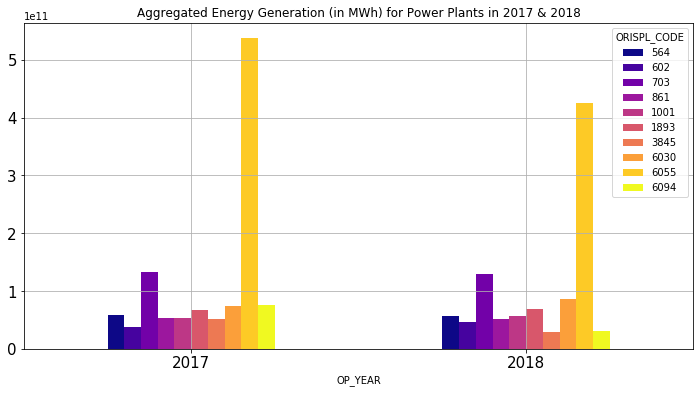

In [56]:
df_gen_plot.plot(kind='bar', 
                 figsize=(12,6),
                 title='Aggregated Energy Generation (in MWh) for Power Plants in 2017 & 2018', 
                 grid=True, 
                 legend=True, 
                 style=None, 
                 rot=0, 
                 fontsize=15, 
                 colormap='plasma')

### 8. Join this with epa_plant_data using ORISPL code (this is the EPA's unique ID for power plants)

In [57]:
df_joined = pd.merge(epa, df_generation_agg, how='inner', left_on='ORISPL', right_on='ORISPL_CODE')

In [58]:
df_joined.head()

,PSTATABB,ORISPL,PNAME,OPRNAME,BANAME,OPRCODE,BACODE,LON,LAT,NAMEPCAP[MW],...,HCL_MASS[lbs],HCL_MEASURE_FLG,HF_RATE_EO[lb/MWh],HF_RATE_HI[lb/MMBtu],HF_MASS[lbs],HF_MEASURE_FLG,HEAT_INPUT[mmBtu],FAC_ID,UNIT_ID,Energy_Generation[MWh]
0,FL,564,Curtis H. Stanton Energy Center,Orlando Utilities Comm,Florida Municipal Power Pool,14610,FMPP,-81.1678,28.4822,1262.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.060776e+07,2569560,797839640,5.874900e+10
1,FL,564,Curtis H. Stanton Energy Center,Orlando Utilities Comm,Florida Municipal Power Pool,14610,FMPP,-81.1678,28.4822,1262.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.816671e+07,2573970,799208930,5.732816e+10
2,GA,703,Bowen,Georgia Power Co,"Southern Company Services, Inc. - Trans",7140,SOCO,-84.9222,34.1256,3540.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.475923e+08,5174080,18721080,1.321515e+11
3,GA,703,Bowen,Georgia Power Co,"Southern Company Services, Inc. - Trans",7140,SOCO,-84.9222,34.1256,3540.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.430010e+08,5182960,18753210,1.294002e+11
4,IL,861,Coffeen,Ameren Illinois Company,Midcontinent Independent Transmission System O...,56697,MISO,-89.4031,39.0586,1005.4,...,0.0,0.0,0.0,0.0,0.0,0.0,5.888265e+07,2814602,10025927,5.338495e+10


In [59]:
df_joined.columns

Index(['PSTATABB', 'ORISPL', 'PNAME', 'OPRNAME', 'BANAME', 'OPRCODE', 'BACODE',
       'LON', 'LAT', 'NAMEPCAP[MW]', 'RMBMFLAG', 'PLPRMFL', 'PLFUELCT',
       'COALFLAG', 'ORISPL_CODE', 'OP_YEAR', 'OP_HOUR', 'OP_TIME', 'GLOAD[MW]',
       'SLOAD[1000lb/hr]', 'SO2_MASS[lbs]', 'SO2_RATE[lbs/mmBtu]',
       'NOX_RATE[lbs/mmBtu]', 'NOX_MASS[lbs]', 'CO2_MASS[tons]',
       'CO2_RATE[tons/mmBtu]', 'HG_RATE_EO[lb/GWh]', 'HG_RATE_HI[lb/TBtu]',
       'HG_MASS[lbs]', 'HCL_RATE_EO[lb/MWh]', 'HCL_RATE_HI[lb/MMBtu]',
       'HCL_MASS[lbs]', 'HCL_MEASURE_FLG', 'HF_RATE_EO[lb/MWh]',
       'HF_RATE_HI[lb/MMBtu]', 'HF_MASS[lbs]', 'HF_MEASURE_FLG',
       'HEAT_INPUT[mmBtu]', 'FAC_ID', 'UNIT_ID', 'Energy_Generation[MWh]'],
      dtype='object')

### 9. Using this new dataframe, calculate capacity factors for all the power plants over time.

__NOTE:__ Capacity Factor = [Generation (MWh)/Capcity (MW) * Number of hours in the time period (h) (e.g. 8760 hours in a year)]

In [60]:
df_joined['Capacity Factor'] = df_joined['Energy_Generation[MWh]']/(df_joined['NAMEPCAP[MW]']*8760)

In [61]:
df_reduced = df_joined.drop(columns = ['OPRCODE','BACODE', 'LON', 'LAT', 'RMBMFLAG', 'ORISPL_CODE', 'SLOAD[1000lb/hr]', 'SO2_MASS[lbs]', 'SO2_RATE[lbs/mmBtu]',
       'NOX_RATE[lbs/mmBtu]', 'NOX_MASS[lbs]', 'CO2_MASS[tons]',
       'CO2_RATE[tons/mmBtu]', 'HG_RATE_EO[lb/GWh]', 'HG_RATE_HI[lb/TBtu]',
       'HG_MASS[lbs]', 'HCL_RATE_EO[lb/MWh]', 'HCL_RATE_HI[lb/MMBtu]',
       'HCL_MASS[lbs]', 'HCL_MEASURE_FLG', 'HF_RATE_EO[lb/MWh]',
       'HF_RATE_HI[lb/MMBtu]', 'HF_MASS[lbs]', 'HF_MEASURE_FLG',])

In [62]:
df_reduced

,PSTATABB,ORISPL,PNAME,OPRNAME,BANAME,NAMEPCAP[MW],PLPRMFL,PLFUELCT,COALFLAG,OP_YEAR,OP_HOUR,OP_TIME,GLOAD[MW],HEAT_INPUT[mmBtu],FAC_ID,UNIT_ID,Energy_Generation[MWh],Capacity Factor
0,FL,564,Curtis H. Stanton Energy Center,Orlando Utilities Comm,Florida Municipal Power Pool,1262.0,BIT,COAL,Yes,2017,301650,22221.41,6706507.0,6.060776e+07,2569560,797839640,5.874900e+10,5314.189382
1,FL,564,Curtis H. Stanton Energy Center,Orlando Utilities Comm,Florida Municipal Power Pool,1262.0,BIT,COAL,Yes,2018,301905,22235.63,6544310.0,5.816671e+07,2573970,799208930,5.732816e+10,5185.665610
2,GA,703,Bowen,Georgia Power Co,"Southern Company Services, Inc. - Trans",3540.4,BIT,COAL,Yes,2017,402200,23888.75,15085792.0,1.475923e+08,5174080,18721080,1.321515e+11,4261.041690
3,GA,703,Bowen,Georgia Power Co,"Southern Company Services, Inc. - Trans",3540.4,BIT,COAL,Yes,2018,402540,22470.94,14771714.0,1.430010e+08,5182960,18753210,1.294002e+11,4172.329115
4,IL,861,Coffeen,Ameren Illinois Company,Midcontinent Independent Transmission System O...,1005.4,RC,COAL,Yes,2017,201138,15399.69,6094172.0,5.888265e+07,2814602,10025927,5.338495e+10,6061.440223
5,IL,861,Coffeen,Ameren Illinois Company,Midcontinent Independent Transmission System O...,1005.4,RC,COAL,Yes,2018,201234,14493.23,5822317.0,5.824258e+07,2818788,10040838,5.100350e+10,5791.045355
6,IN,1001,Cayuga,Duke Energy Indiana Inc,Midcontinent Independent Transmission System O...,1184.9,BIT,COAL,Yes,2017,301650,14976.34,6148136.0,5.828624e+07,5112900,18537540,5.385767e+10,5188.738290
7,IN,1001,Cayuga,Duke Energy Indiana Inc,Midcontinent Independent Transmission System O...,1184.9,BIT,COAL,Yes,2018,301905,15885.96,6551956.0,6.097006e+07,5121675,18569355,5.739513e+10,5529.543421
8,LA,6055,Big Cajun 2,Entergy Louisiana LLC,Midcontinent Independent Transmission System O...,2632.9,SUB,COAL,Yes,2017,301707,14904.85,61328330.0,6.549354e+07,20978400,71457675,5.372362e+11,23293.072278
9,LA,6055,Big Cajun 2,Entergy Louisiana LLC,Midcontinent Independent Transmission System O...,2632.9,SUB,COAL,Yes,2018,301851,12365.24,48590060.0,5.232116e+07,21009600,71563950,4.256489e+11,18454.958411


### 10. Choose something else you think could be interesting to visualize with this data

__NOTE:__ I made this part up, but thought it would be interesting to see what people do.

In [63]:
#Went over time!